## LBP(Local Binary Pattern)
- 이미지의 미세한 질감(micro-texture)을 표현하는데 효과적인 연산자

## Practice
1) LBP 적용해보기

In [5]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
%matplotlib inline

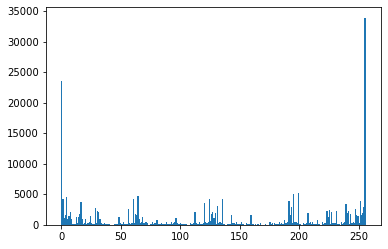

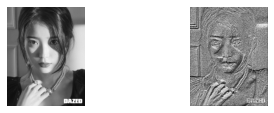

In [9]:
## LBP 파라미터
radius = 1
numPoints = 8 * radius
method = 'default'

img = cv2.imread('iu.jpg')
img = cv2.resize(img, None, fx=0.4, fy=0.4)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# LBP 계산
lbp = local_binary_pattern(gray, numPoints, radius, method)
lbp = lbp.astype('uint8')

## LBP 히스토그램 시각화
n_bins = lbp.max() + 1

plt.subplot(1, 1, 1)
plt.hist(lbp.ravel(), bins=n_bins, range=(0,n_bins))
plt.show()

## 이미지 시각화
gray = cv2.cvtColor(gray, cv2.COLOR_RGB2BGR)
lbp = cv2.cvtColor(lbp, cv2.COLOR_RGB2BGR)
plt.subplot(2, 2, 1)
plt.imshow(gray)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(lbp)
plt.axis('off')
plt.show()

In [4]:
print(">> shape of gray image {}".format(gray.shape))
print(gray)
print()

print(">> shape of lbp image {}".format(lbp.shape))
print(lbp)

>> shape of gray image (551, 432)
[[103 104 102 ... 123 122 121]
 [102 100 101 ... 121 117 121]
 [101 105 102 ... 122 118 121]
 ...
 [ 21  20  19 ...  13  11  17]
 [ 20  22  20 ...  16  19  12]
 [ 22  24  22 ...  18  21  18]]

>> shape of lbp image (551, 432)
[[  1   0  16 ...   0  16  80]
 [134 255 238 ... 126 255  68]
 [199   0 241 ... 120 251  68]
 ...
 [132 252 255 ... 220 255   0]
 [199  64 250 ... 225  64 124]
 [  3   0  25 ...  19   0  16]]
